# Imports

In [1]:
from urllib.request import urlopen
test_images = urlopen("https://web.mit.edu/torralba/www/TestImages.txt").read().decode('utf-8').split()
train_images = urlopen("https://web.mit.edu/torralba/www/TrainImages.txt").read().decode('utf-8').split()

from os import path, listdir

import cv2
from PIL import Image

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
layers = tf.keras.layers

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# tf.config.optimizer.set_jit(True)


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Read Data

In [3]:
data = []
labels = []

size = (64, 64)
# path  = "./app/Lab3/Data/Images"
path  = "./Data/Images"

for category in listdir(path):
    for image in listdir(f"{path}/{category}"):
        try:
            filepath = f"{path}/{category}/{image}"
            # filepath
            img = cv2.imread(filepath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, size)
            img = img / 255.0
            data.append(img)
            labels.append(category)
        except Exception as e:
            print(filepath, e, img)
            # try:
            #     filepath = path.join(f"./Data/Images/{category}/{image}")
            #     img = Image.open(filepath)
            #     img = img.resize(size)
            #     img = np.array(img)
            #     img = img / 255.0
            #     data.append(img)
            #     labels.append(category)
            # except Exception as e:
            #     print(filepath, e, img)
data = np.array(data)
labels = np.array(labels)

./Data/Images/bar/bar_0527.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/buffet/Buffet_Lettuce_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/buffet/Buffet_Set_Up_2_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/buffet/Buffet_Set_Up_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/closet/closet_design_lg_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed

In [4]:
labels.shape

(15590,)

In [5]:
data.shape

(15590, 64, 64, 3)

# Transform Data

In [6]:
string = labels.copy()
string = string[sorted(np.unique(string, return_index=True)[1])]
str_to_int = dict(zip(string, range(len(string))))
int_to_str = dict(zip(range(len(string)), string))


In [7]:
labels


array(['airport_inside', 'airport_inside', 'airport_inside', ...,
       'winecellar', 'winecellar', 'winecellar'], dtype='<U19')

In [8]:
def transform(x):
    return str_to_int[x]
if labels.dtype == "<U19":
    labels = np.array(list(map(transform, labels)))
labels

array([ 0,  0,  0, ..., 66, 66, 66])

In [9]:
# data = data[...,::-1]

# Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

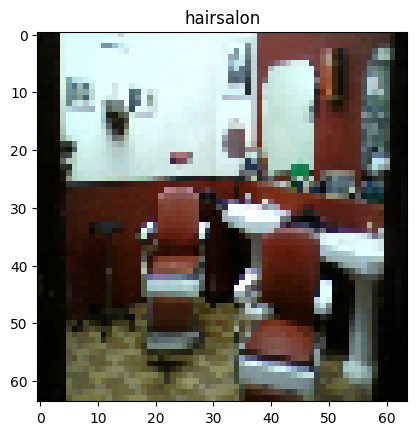

In [11]:
integer = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[integer])
plt.title(int_to_str[np.argmax(y_train[integer])])
plt.show()

# Help Fuctions

In [ ]:
def display_history(history, names, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()
    plt.show()

def predict_random(model, data_x=X_test, data_y=y_test):
    choose = np.random.randint(0, data_x.shape[0])
    plt.imshow(data_x[choose])
    predictions = model.predict(data_x)
    # plt.title(f'Predicted Object: {np.argmax(predictions[choose]) + 1} | Real Object: {np.argmax(data_y[choose]) + 1}')
    plt.title(f'Predicted Object: {int_to_str[np.argmax(predictions[choose])]} | Real Object: {int_to_str[np.argmax(data_y[choose])]}')

def predict(model, batch_size=64, epochs=40, val_split=0.2):
    # history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    if isinstance(val_split, float):
        history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, stratify=y_train)
    elif isinstance(val_split, tuple):
        history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=val_split)
    display_history(history, ['loss', 'val_loss'], "Loss")
    display_history(history, ['accuracy', 'val_accuracy'], "Accuracy")
    model.evaluate(X_test, y_test)
    predict_random(model, X_test, y_test)

# Baseline

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,115,651 (8.07 MB)

 Trainable params: 2,115,587 (8.07 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - Top2: 0.0764 - accuracy: 0.0406 - loss: 4.4523 - val_Top2: 0.1130 - val_accuracy: 0.0561 - val_loss: 4.1068
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - Top2: 0.1459 - accuracy: 0.0822 - loss: 3.9079 - val_Top2: 0.1731 - val_accuracy: 0.0978 - val_loss: 3.9109
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - Top2: 0.1864 - accuracy: 0.1102 - loss: 3.6863 - val_Top2: 0.2196 - val_accuracy: 0.1399 - val_loss: 3.7444
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - Top2: 0.2197 - accuracy: 0.1308 - loss: 3.5332 - val_Top2: 0.2517 - val_accuracy: 0.1499 - val_loss: 3.4821
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - Top2: 0.2592 - accuracy: 0.1648 - loss: 3.3450 - val_Top2: 0.2489 - val_accuracy: 0.1487 - val_loss: 3.4517
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - Top2: 0.3042 - accuracy: 0.2018 - loss: 3.1576 - val_Top2: 0.2786 - val_accuracy: 0.1723 - val_loss: 3.3644
Epoch 7/20

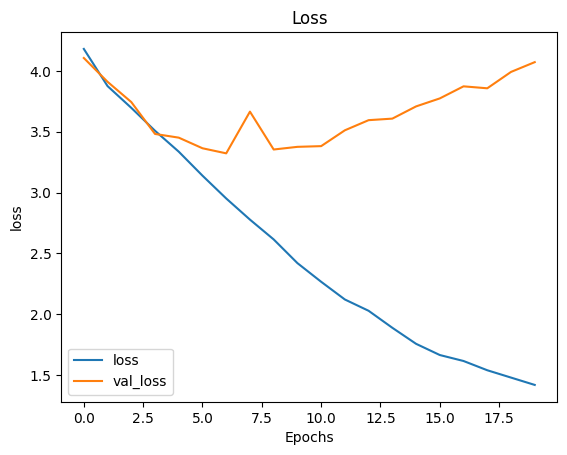

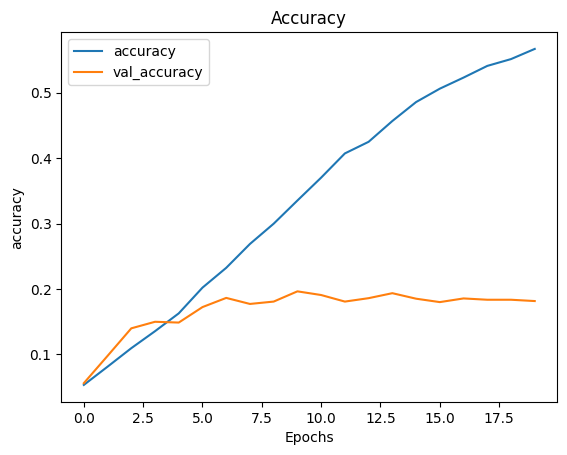

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Top2: 0.2659 - accuracy: 0.1773 - loss: 4.1960
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


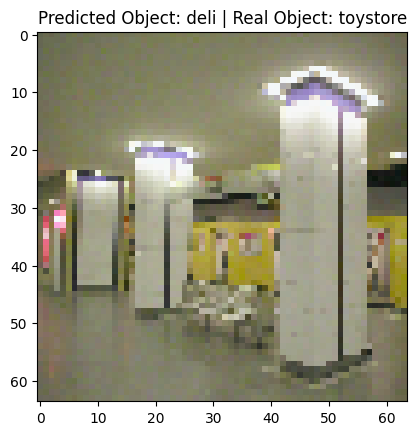

In [ ]:
model_baseline = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_baseline.summary()
model_baseline.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_baseline, 64, 20)

# Bigger Num of Filters in conv2D

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,796,739 (64.07 MB)

 Trainable params: 16,796,611 (64.07 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - Top2: 0.0685 - accuracy: 0.0346 - loss: 6.8155 - val_Top2: 0.0974 - val_accuracy: 0.0533 - val_loss: 4.1773
Epoch 2/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - Top2: 0.0962 - accuracy: 0.0502 - loss: 4.1130 - val_Top2: 0.1311 - val_accuracy: 0.0693 - val_loss: 4.1366
Epoch 3/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - Top2: 0.1153 - accuracy: 0.0590 - loss: 4.0589 - val_Top2: 0.1379 - val_accuracy: 0.0689 - val_loss: 4.0033
Epoch 4/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - Top2: 0.1250 - accuracy: 0.0617 - loss: 3.9878 - val_Top2: 0.1459 - val_accuracy: 0.0770 - val_loss: 3.9845
Epoch 5/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - Top2: 0.1412 - accuracy: 0.0747 - loss: 3.9226 - val_Top2: 0.1495 - val_accuracy: 0.0741 - val_loss: 3.9329
Epoch 6/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - Top2: 0.1476 - accuracy: 0.0796 - loss: 3.8664 - val_Top2: 0.1655 - val_accuracy: 0.0854 - val_loss: 3.8834
Epoch 7/40
78/78 ━━━━━━━━━━━━━━━━━

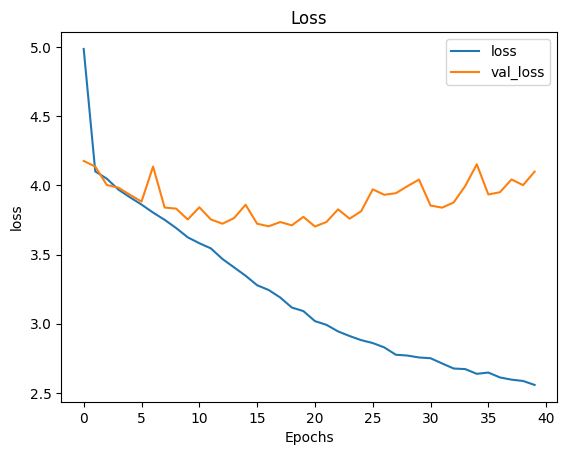

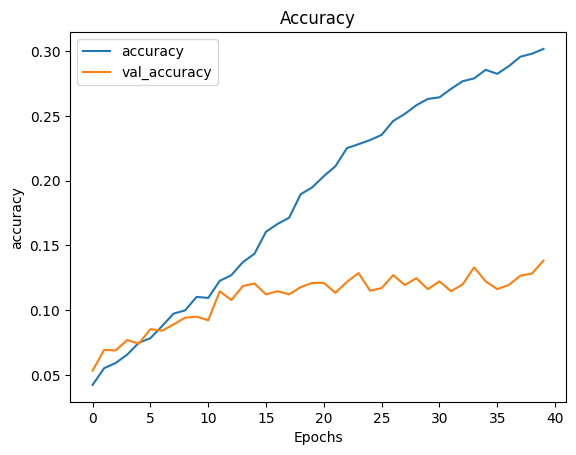

98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - Top2: 0.2058 - accuracy: 0.1207 - loss: 4.1072
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step


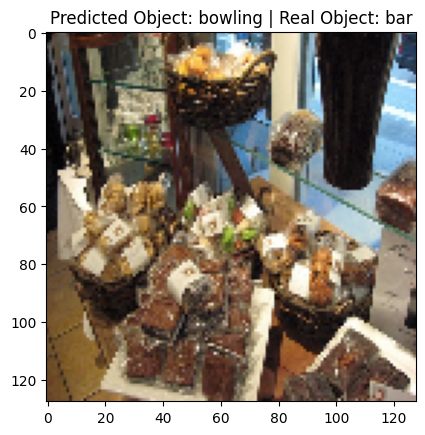

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Large Num of Filters in conv2D

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,576,003 (128.08 MB)

 Trainable params: 33,575,747 (128.08 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - Top2: 0.0646 - accuracy: 0.0330 - loss: 8.5241 - val_Top2: 0.0870 - val_accuracy: 0.0449 - val_loss: 4.1773
Epoch 2/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - Top2: 0.0856 - accuracy: 0.0445 - loss: 4.1582 - val_Top2: 0.0934 - val_accuracy: 0.0413 - val_loss: 4.1122
Epoch 3/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - Top2: 0.0991 - accuracy: 0.0522 - loss: 4.0884 - val_Top2: 0.1042 - val_accuracy: 0.0521 - val_loss: 4.0782
Epoch 4/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - Top2: 0.1084 - accuracy: 0.0560 - loss: 4.0196 - val_Top2: 0.0998 - val_accuracy: 0.0593 - val_loss: 4.0184
Epoch 5/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - Top2: 0.1182 - accuracy: 0.0694 - loss: 3.9647 - val_Top2: 0.1114 - val_accuracy: 0.0589 - val_loss: 4.0067
Epoch 6/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - Top2: 0.1292 - accuracy: 0.0701 - loss: 3.9042 - val_Top2: 0.1295 - val_accuracy: 0.0749 - val_loss: 3.9364
Epoch 7/40
78/78 ━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

# More Conv2D

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,395 (1.14 MB)

 Trainable params: 299,203 (1.14 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - Top2: 0.0792 - accuracy: 0.0421 - loss: 4.5934 - val_Top2: 0.0537 - val_accuracy: 0.0192 - val_loss: 7.9615
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - Top2: 0.1580 - accuracy: 0.0906 - loss: 3.8148 - val_Top2: 0.0693 - val_accuracy: 0.0405 - val_loss: 8.1214
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - Top2: 0.1877 - accuracy: 0.1105 - loss: 3.6653 - val_Top2: 0.1639 - val_accuracy: 0.0926 - val_loss: 3.9186
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - Top2: 0.2112 - accuracy: 0.1249 - loss: 3.5525 - val_Top2: 0.2088 - val_accuracy: 0.1323 - val_loss: 3.6152
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - Top2: 0.2349 - accuracy: 0.1418 - loss: 3.4647 - val_Top2: 0.2485 - val_accuracy: 0.1583 - val_loss: 3.5313
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - Top2: 0.2433 - accuracy: 0.1500 - loss: 3.3776 - val_Top2: 0.2457 - val_accuracy: 0.1567 - val_loss: 3.4804
Epoch 7/40

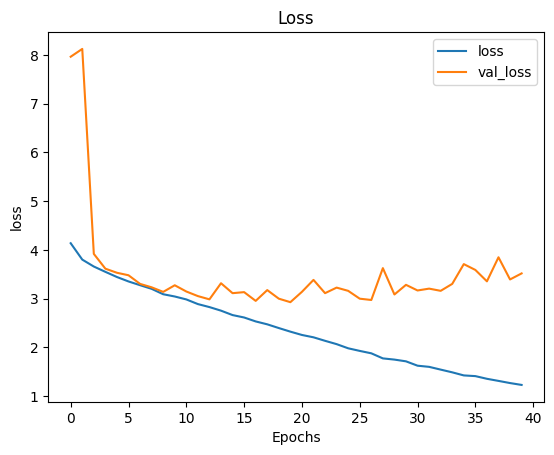

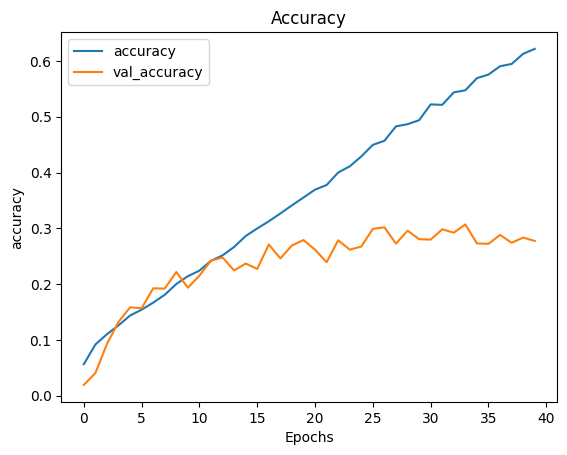

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - Top2: 0.3778 - accuracy: 0.2538 - loss: 3.6103
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


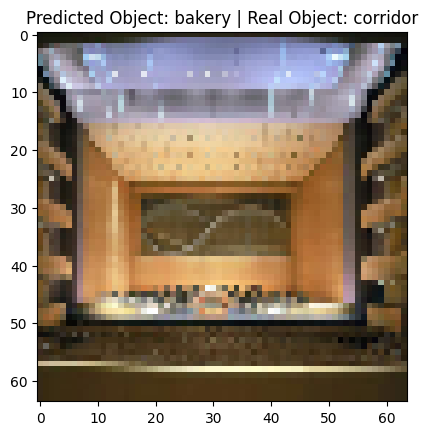

In [18]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, 64, 40)

390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


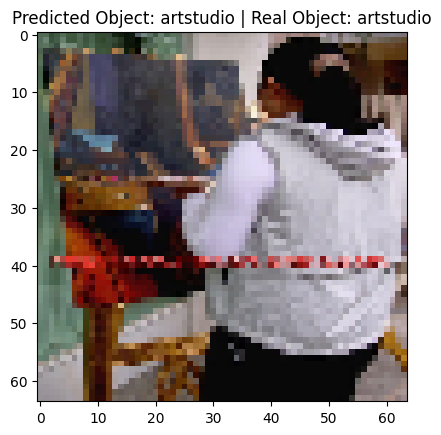

In [20]:
predict_random(model, data_x=X_train, data_y=y_train)

# Even More Conv2D

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_176 (Conv2D)             │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_176         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_177 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_177         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_178 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_178         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_179 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_179         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_180 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_180         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_181 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_181         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_182 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_182         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_183 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_183         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_120               │ (None, 16, 16, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_184 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_184         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_121               │ (None, 4, 4, 64)       │             

 Total params: 208,723 (815.32 KB)

 Trainable params: 207,827 (811.82 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - Top2: 0.0723 - accuracy: 0.0391 - loss: 4.1518 - val_Top2: 0.0914 - val_accuracy: 0.0413 - val_loss: 4.0608
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - Top2: 0.1283 - accuracy: 0.0641 - loss: 3.8932 - val_Top2: 0.0914 - val_accuracy: 0.0413 - val_loss: 4.3456
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - Top2: 0.1376 - accuracy: 0.0697 - loss: 3.8157 - val_Top2: 0.1283 - val_accuracy: 0.0649 - val_loss: 4.0173
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - Top2: 0.1431 - accuracy: 0.0763 - loss: 3.7603 - val_Top2: 0.1651 - val_accuracy: 0.0914 - val_loss: 3.7444
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - Top2: 0.1516 - accuracy: 0.0796 - loss: 3.7160 - val_Top2: 0.1731 - val_accuracy: 0.0922 - val_loss: 3.6847
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - Top2: 0.1659 - accuracy: 0.0906 - loss: 3.6774 - val_Top2: 0.1699 - val_accuracy: 0.0894 - val_loss: 3.6362
Epoch 7/40
156/156 ━━━

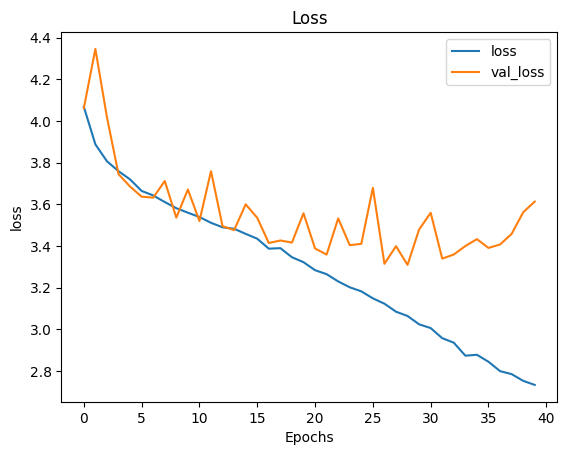

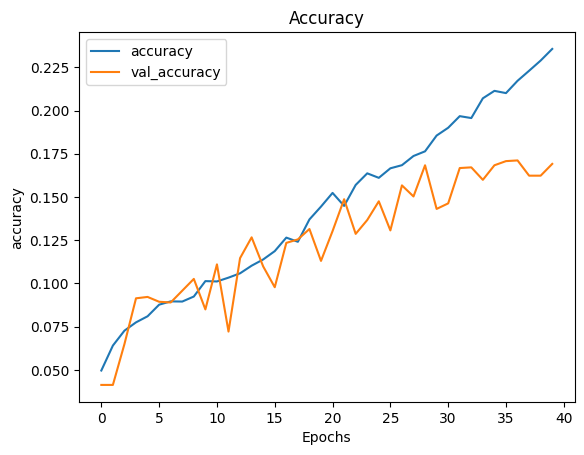

98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - Top2: 0.2588 - accuracy: 0.1444 - loss: 3.6299
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step


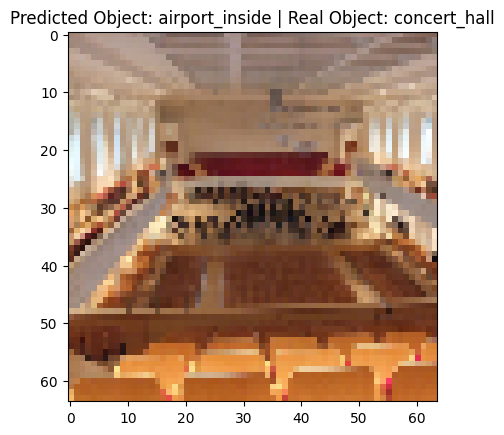

In [54]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),
        
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((4, 4)),

        # layers.GlobalAveragePooling2D(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),

        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, 64, 40)

78/78 ━━━━━━━━━━━━━━━━━━━━ 76s 978ms/step - Top2: 0.3378 - accuracy: 0.2140 - loss: 3.0360 - val_Top2: 0.2445 - val_accuracy: 0.1411 - val_loss: 3.7821


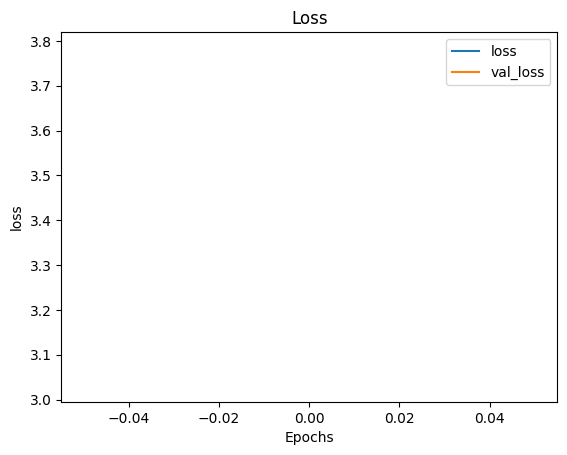

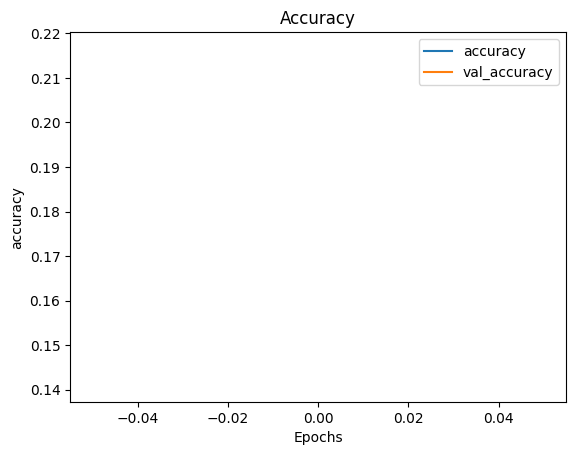

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - Top2: 0.2369 - accuracy: 0.1448 - loss: 3.7822
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


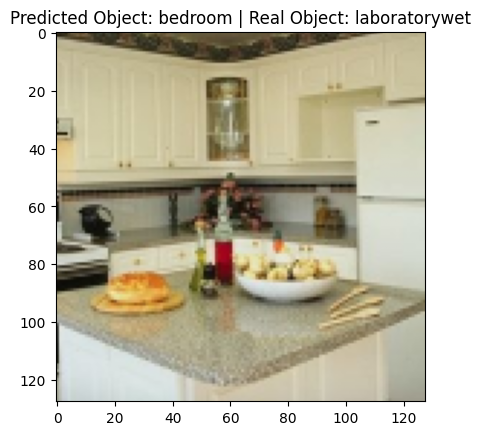

In [ ]:
predict(model, 128, 1)

# Elu instead of Relu

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_272 (Conv2D)             │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_271         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_273 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_272         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_274 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_273         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_165               │ (None, 16, 16, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_275 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_274         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_166               │ (None, 4, 4, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_276 (Conv2D)             │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_275         │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_167               │ (None, 1, 1, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 1, 1, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_163 (Dropout)           │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 1, 1, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_164 (Dropout)           │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_165 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 67)             │        17,21

 Total params: 171,523 (670.01 KB)

 Trainable params: 170,947 (667.76 KB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 424ms/step - Top2: 0.0664 - accuracy: 0.0360 - loss: 4.2238 - val_Top2: 0.0649 - val_accuracy: 0.0413 - val_loss: 4.1365
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 66s 426ms/step - Top2: 0.1378 - accuracy: 0.0747 - loss: 3.8489 - val_Top2: 0.0549 - val_accuracy: 0.0269 - val_loss: 4.5738
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 62s 397ms/step - Top2: 0.1670 - accuracy: 0.0943 - loss: 3.7208 - val_Top2: 0.1170 - val_accuracy: 0.0625 - val_loss: 4.1082
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 404ms/step - Top2: 0.1977 - accuracy: 0.1067 - loss: 3.5801 - val_Top2: 0.1828 - val_accuracy: 0.0942 - val_loss: 3.6208
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 65s 415ms/step - Top2: 0.2206 - accuracy: 0.1208 - loss: 3.5058 - val_Top2: 0.2224 - val_accuracy: 0.1363 - val_loss: 3.4690
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 66s 425ms/step - Top2: 0.2375 - accuracy: 0.1320 - loss: 3.4259 - val_Top2: 0.2749 - val_accuracy: 0.1760 - val_loss: 3.2878
Epoch 7/20

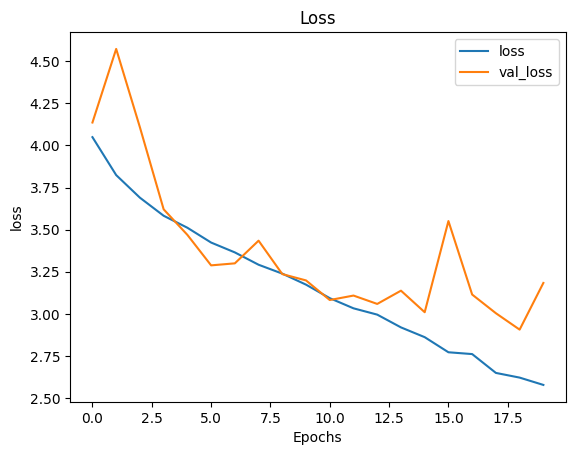

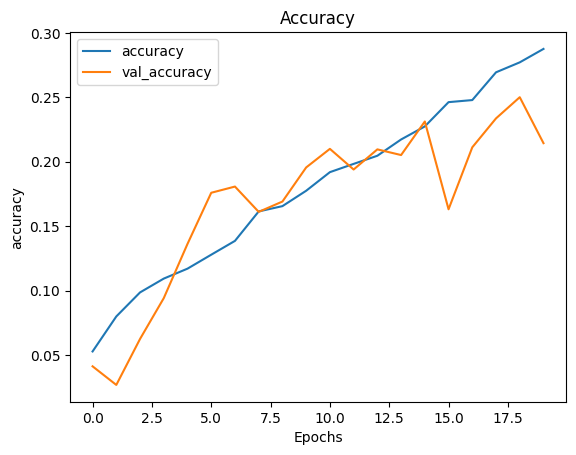

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - Top2: 0.3268 - accuracy: 0.2124 - loss: 3.2195
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step


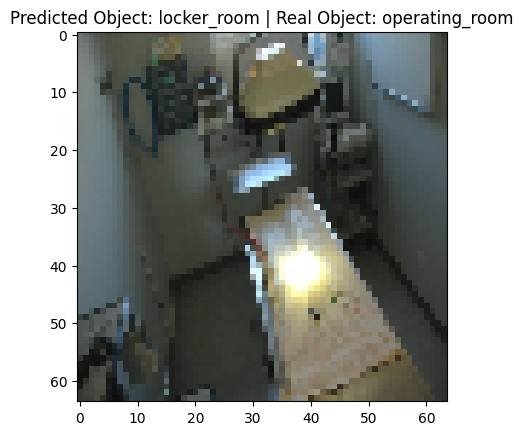

In [72]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        # layers.MaxPooling2D(pool_size=(2, 2)),

        # layers.GlobalAveragePooling2D(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),


        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, 128, 20)

# Gelu instead of Relu

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_186 (Conv2D)             │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_186         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_123               │ (None, 16, 16, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_187 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_187         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_188 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_188         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_189 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_189         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_190 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_190         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_191 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_191         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_192 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_192         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_193 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_193         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_194 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_194         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_124               │ (None, 4, 4, 64)       │             

 Total params: 208,723 (815.32 KB)

 Trainable params: 207,827 (811.82 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - Top2: 0.0626 - accuracy: 0.0314 - loss: 4.1375 - val_Top2: 0.0934 - val_accuracy: 0.0449 - val_loss: 4.0926
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - Top2: 0.0911 - accuracy: 0.0446 - loss: 4.0160 - val_Top2: 0.0866 - val_accuracy: 0.0413 - val_loss: 4.0351
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - Top2: 0.1290 - accuracy: 0.0668 - loss: 3.8921 - val_Top2: 0.0922 - val_accuracy: 0.0413 - val_loss: 4.2693
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - Top2: 0.1454 - accuracy: 0.0742 - loss: 3.7860 - val_Top2: 0.1070 - val_accuracy: 0.0589 - val_loss: 4.1529
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 177ms/step - Top2: 0.1514 - accuracy: 0.0824 - loss: 3.7429 - val_Top2: 0.1671 - val_accuracy: 0.0890 - val_loss: 3.6814
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - Top2: 0.1527 - accuracy: 0.0821 - loss: 3.7117 - val_Top2: 0.1719 - val_accuracy: 0.0862 - val_loss: 3.6733
Epoch 7/40

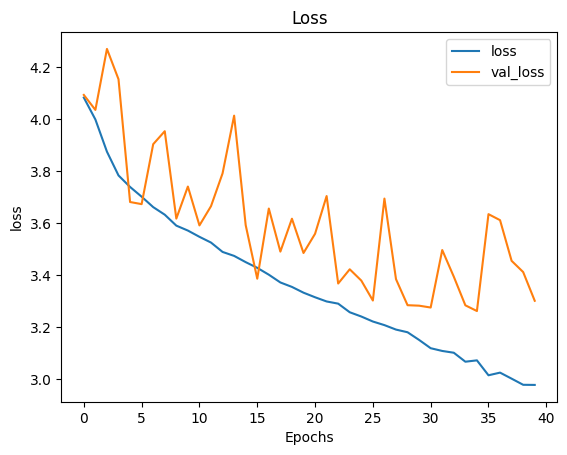

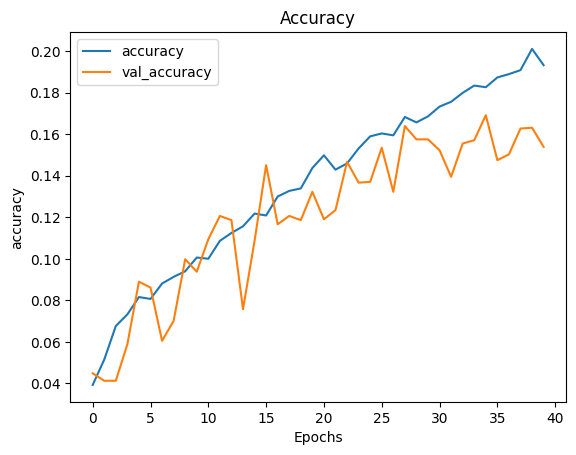

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - Top2: 0.2674 - accuracy: 0.1567 - loss: 3.3315
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


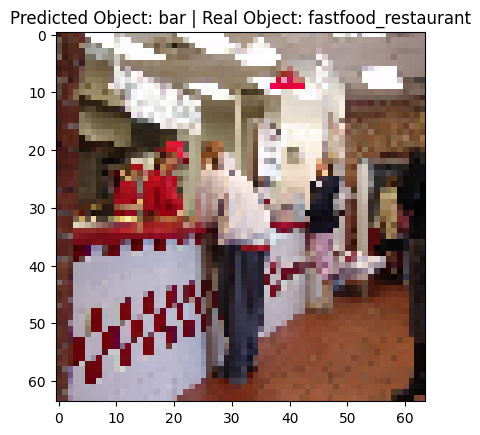

In [55]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),
        
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        # layers.GlobalAveragePooling2D(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),

        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, 64, 40)

# Dropout after first conv2D

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_156 (Conv2D)             │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_156         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_157 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_157         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_158 (Conv2D)             │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_158         │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_111               │ (None, 16, 16, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_159 (Conv2D)             │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_159         │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 4, 4, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_160 (Conv2D)             │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_160         │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 1, 1, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 1, 1, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1, 1, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 67)             │        17,21

 Total params: 474,723 (1.81 MB)

 Trainable params: 473,699 (1.81 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 91s 557ms/step - Top2: 0.0745 - accuracy: 0.0381 - loss: 4.2605 - val_Top2: 0.0914 - val_accuracy: 0.0477 - val_loss: 4.4256
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 93s 597ms/step - Top2: 0.1510 - accuracy: 0.0788 - loss: 3.8386 - val_Top2: 0.0557 - val_accuracy: 0.0212 - val_loss: 4.7263
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 88s 562ms/step - Top2: 0.1714 - accuracy: 0.0929 - loss: 3.7345 - val_Top2: 0.1832 - val_accuracy: 0.0994 - val_loss: 3.7255
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 84s 539ms/step - Top2: 0.1909 - accuracy: 0.1054 - loss: 3.5904 - val_Top2: 0.2329 - val_accuracy: 0.1319 - val_loss: 3.5040
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 86s 554ms/step - Top2: 0.2131 - accuracy: 0.1111 - loss: 3.5173 - val_Top2: 0.2653 - val_accuracy: 0.1499 - val_loss: 3.3425
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 84s 537ms/step - Top2: 0.2318 - accuracy: 0.1258 - loss: 3.4302 - val_Top2: 0.2605 - val_accuracy: 0.1595 - val_loss: 3.4123
Epoch 7/40

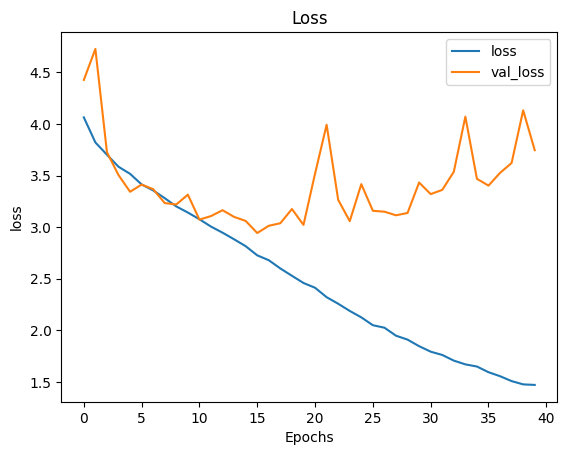

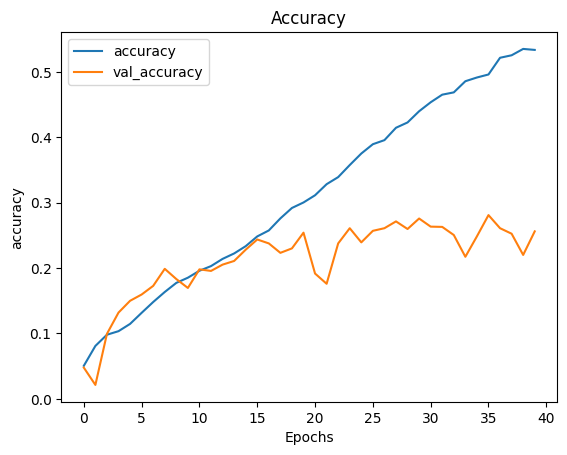

98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - Top2: 0.3706 - accuracy: 0.2582 - loss: 3.7301
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step


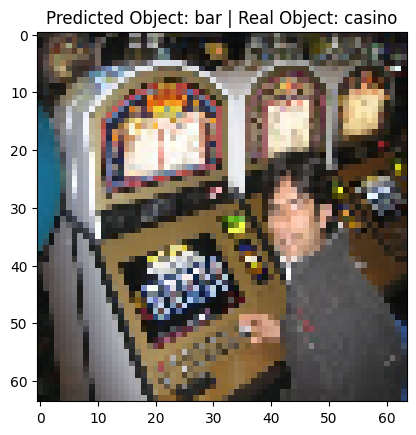

In [51]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D((4, 4)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((4, 4)),

        # layers.GlobalAveragePooling2D(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, 64, 40)

# Some Depreceated Things

In [ ]:
# data = []
# for train_image in train_images:
#     try:
#         filepath = path.join(f"./Data/Images/{train_image}")
#         # filepath
#         img = cv2.imread(filepath)
#         img = cv2.resize(img, (256, 256))  # Resize if needed
#         img = img / 255.0  # Normalize
#         data.append(img)
#     except Exception as e:
#         print(filepath, e)
# train_data_x = np.array(data)

# data = []
# for test_image in test_images:
#     try:
#         filepath = path.join(f"./Data/Images/{test_image}")
#         # filepath
#         img = cv2.imread(filepath)
#         img = cv2.resize(img, (256, 256))  # Resize if needed
#         img = img / 255.0  # Normalize
#         data.append(img)
#     except Exception as e:
#         print(filepath, e)
# test_data_x = np.array(data)

In [ ]:
# test_data_x.shape, train_data_x.shape

In [ ]:
# plt.imshow(test_data_x[np.random.randint(0, test_data_x.shape[0])])
# plt.show()
# plt.imshow(train_data_x[np.random.randint(0, train_data_x.shape[0])])